### 1.Project Setup and Data Preparation

#### A. Environment Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from scipy.stats import f_oneway
from sklearn.metrics import brier_score_loss, log_loss
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, brier_score_loss, log_loss
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, roc_curve, auc, brier_score_loss, log_loss, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout, Add
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, brier_score_loss, log_loss
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, MultiHeadAttention, Input
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, brier_score_loss, log_loss
import matplotlib.pyplot as plt

# Set visualization style
sns.set(style="whitegrid")


#### B. Data Cleaning and Preprocessing

Step 1: Load and Inspect the Data
We'll begin by loading the dataset and examining its contents, focusing on data types, presence of null values, and a brief statistical overview.

In [2]:
# Load the dataset
file_path = './data/hotel_bookings.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic information about the dataset
print(data.head())
print(data.info())
print(data.describe(include='all'))

data.head()

# Check for missing values
print(data.isnull().sum())

# Exploring unique values in a geographical column
print(data['country'].value_counts())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

Step 2: Visualize Data to Identify Outliers
Before modifying any data, let's visualize the key numerical columns to better understand their distributions and identify any potential outliers.

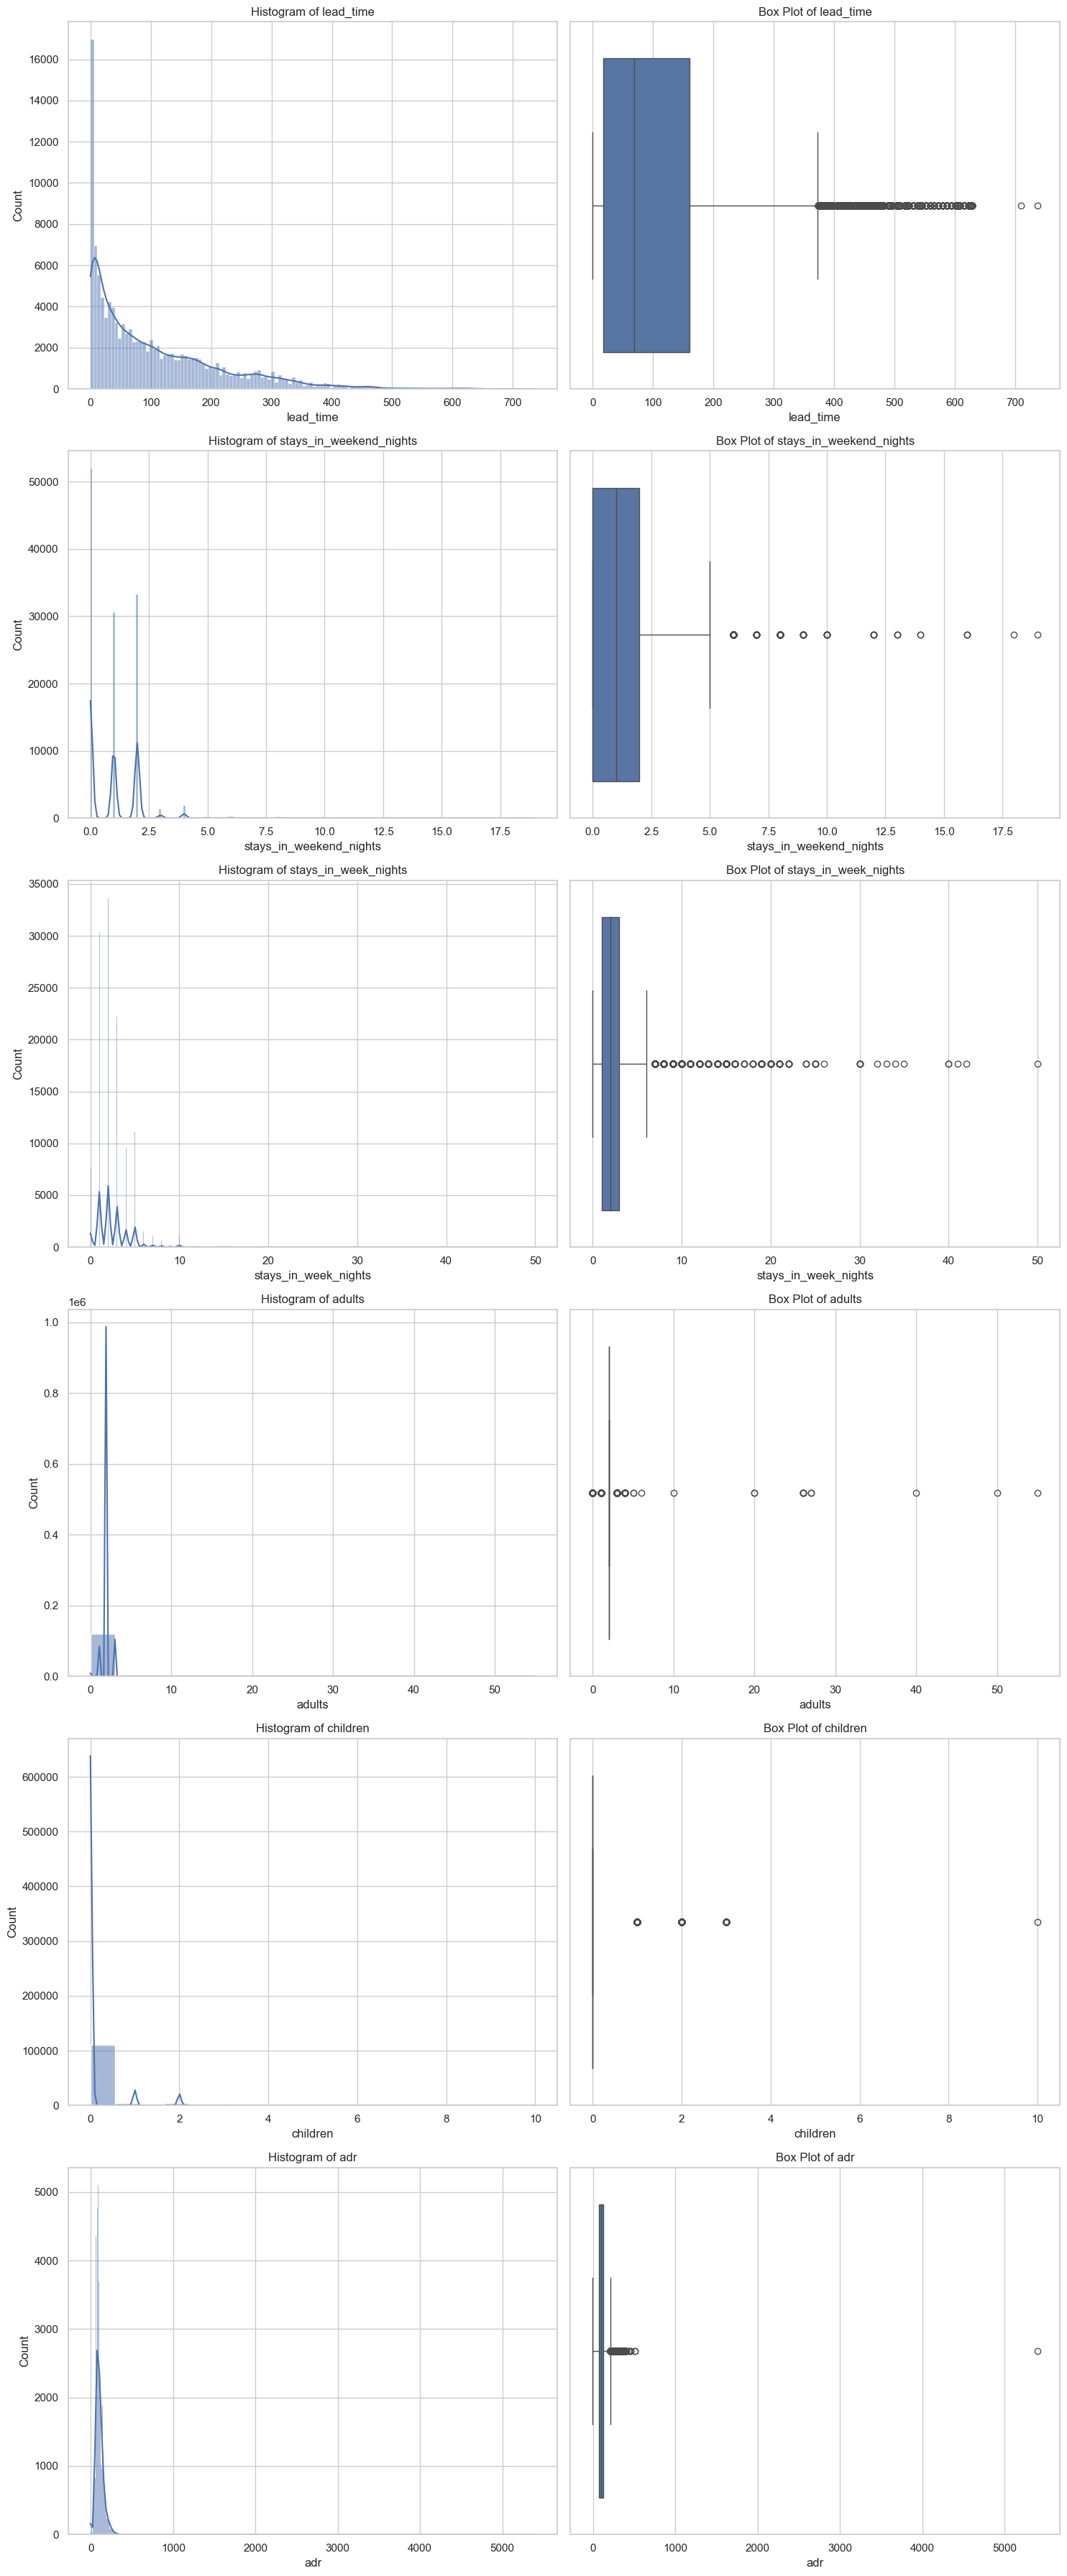

In [3]:
# Set style
sns.set(style="whitegrid")

# List of columns to plot
numerical_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'adr']

# Create a figure for histograms and box plots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(15, 6 * len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    # Histogram
    sns.histplot(data[col], kde=True, ax=axes[i][0])
    axes[i][0].set_title(f'Histogram of {col}')

    # Boxplot
    sns.boxplot(x=data[col], ax=axes[i][1])
    axes[i][1].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


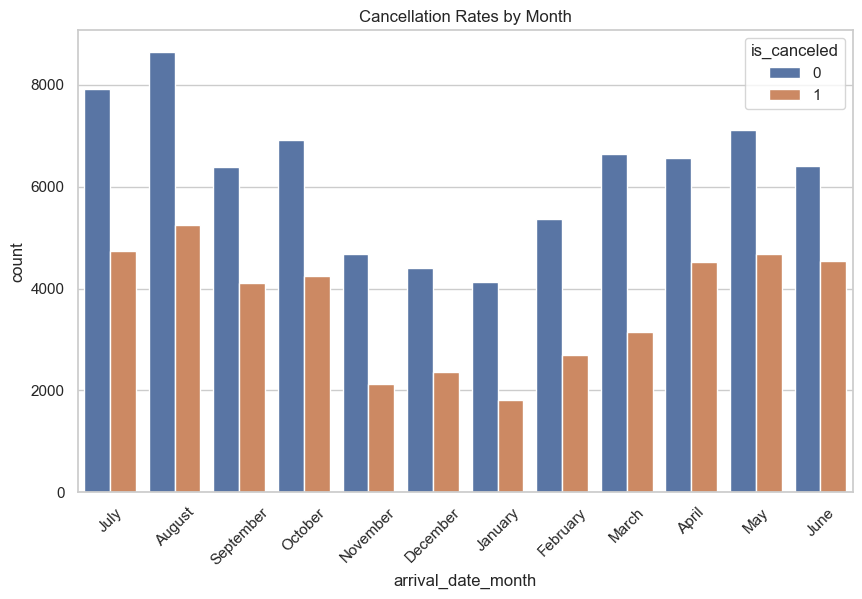

In [3]:
# Visualization of cancellations by month
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_date_month', hue='is_canceled', data=data)
plt.title('Cancellation Rates by Month')
plt.xticks(rotation=45)
plt.show()

Step 3: Handle Missing Values
We'll check each column for missing values and decide on the most appropriate handling method based on the content and context of the data.

In [4]:
# Check for missing values
data.isnull().sum()

# Handle missing values
data['children'].fillna(0, inplace=True)  # Assume missing children means 0
data['country'].fillna(data['country'].mode()[0], inplace=True)  # Replace missing country with mode
data['agent'].fillna(0, inplace=True)  # Assume no agent involved
data['company'].fillna(0, inplace=True)  # Assume no company involved

# Verify changes
data.isnull().sum()
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Step-4: Feature Engineering
 - Convert arrival_date_month into a numerical format (1 for January, 12 for December).
- Encode categorical variables using one-hot encoding (e.g., country, meal, market_segment).
- Create new features such as total number of guests and total stay duration.

In [5]:
# Create new features
data['total_guests'] = data['adults'] + data['children'] + data['babies']
data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

# Preview the data to see the new features
data[['total_guests', 'total_stay']].head()

# Temporarily preserve 'country' for geographical splits
data['country_original'] = data['country']

# One-hot encode categorical variables
categorical_cols = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 
                    'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
data = pd.get_dummies(data, columns=categorical_cols)

# Preview the data to see the changes
data.head()



,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,July,27,1,0,0,2,0.0,...,False,False,False,True,False,False,False,False,True,False
1,0,737,2015,July,27,1,0,0,2,0.0,...,False,False,False,True,False,False,False,False,True,False
2,0,7,2015,July,27,1,0,1,1,0.0,...,False,False,False,True,False,False,False,False,True,False
3,0,13,2015,July,27,1,0,1,1,0.0,...,False,False,False,True,False,False,False,False,True,False
4,0,14,2015,July,27,1,0,2,2,0.0,...,False,False,False,True,False,False,False,False,True,False


#### C. Final Preparation and Overview of Processed Data
Our strategy for data splitting is structured to assess the model's ability to generalize across both time and geography.
- Temporal Split:
   - Training Data: Includes bookings before July 15, 2017, excluding specific countries (BRA, USA, CHN, RUS, NOR, ISR).
   - Seen Test Data: Consists of bookings after July 15, 2017, from countries not excluded, testing the model on newer data similar to the training set.
    - Unseen Test Data: Contains bookings after July 15, 2017, only from the excluded countries, assessing the model’s ability to generalize to completely new geographic regions.
- Geographical Split:
   - Excluded Countries for Testing: Data from Brazil, USA, China, Russia, Norway, and Israel is used to form an unseen test set to evaluate the model on countries it hasn’t been trained on.
    - Seen Countries for Testing: Includes data from countries not listed as excluded, ensuring the model is tested on geographic regions it was trained on.
- Data Utilization:
    - Leftover Data: Records not fitting the conditions for inclusion in either the training or test sets, necessitating further review to determine their use or exclusion based on factors like country designation or data quality.

Here, The seen test set evaluates the model's performance on data temporally closer but still unseen during training, ensuring it remains effective over time. On the other side, the unseen test set is crucial for testing the model’s performance on data from regions it has never encountered, providing insights into its ability to generaliz

But before we proceed with creating different training and testing sets, it's a good idea to first understand the distribution of our data across different countries. This will help us select appropriate countries for your exclusion criteria based on their representation in the dataset

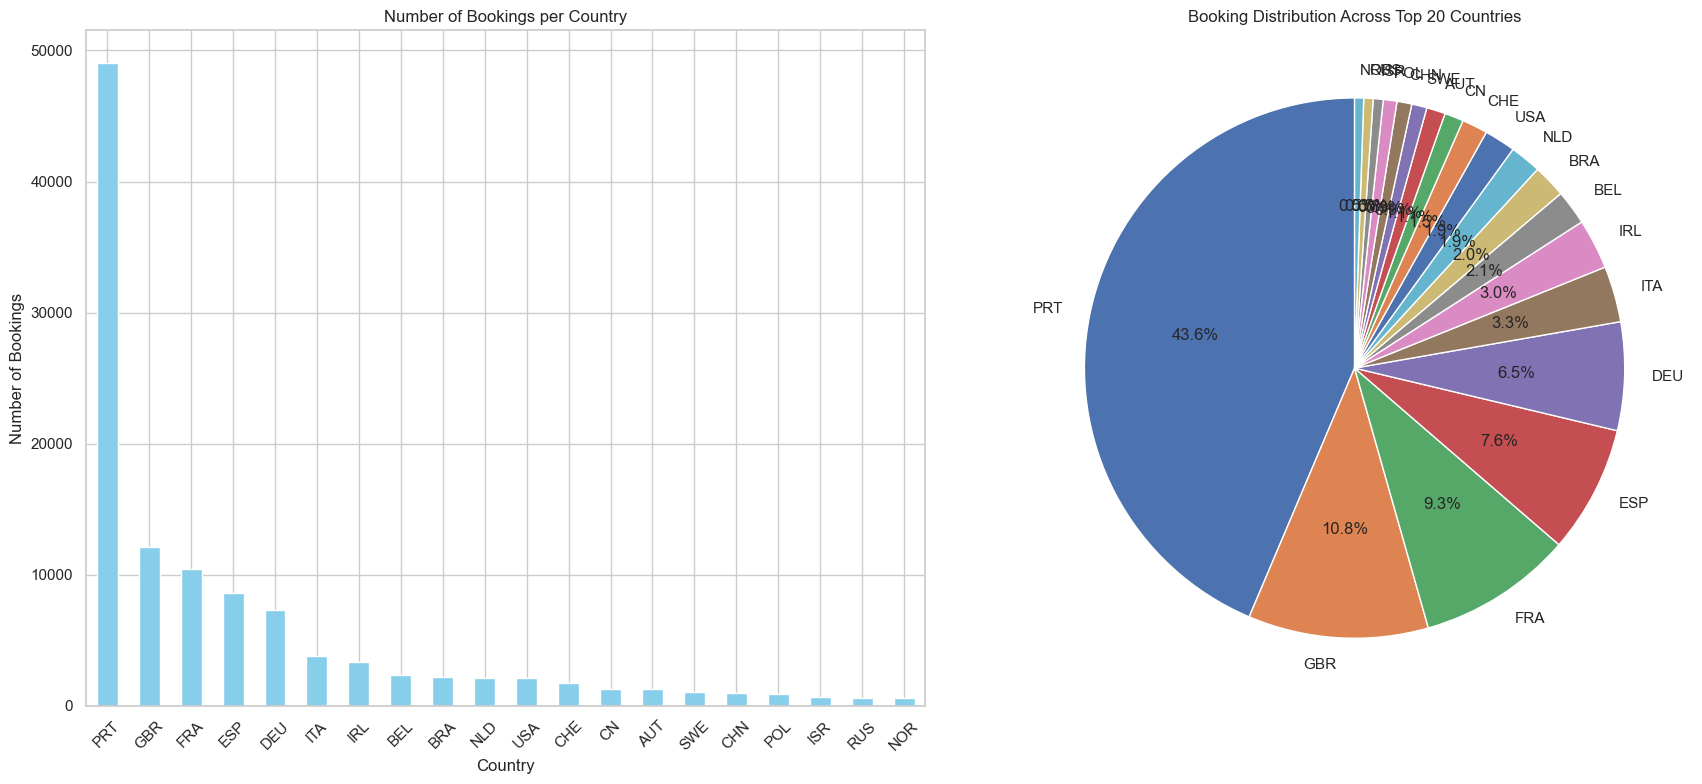

In [6]:
# Get the count of bookings per country and focus on the top 20 countries
country_counts = data['country_original'].value_counts()
top_countries = country_counts[:20]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Bar chart on the first subplot
top_countries.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Number of Bookings per Country')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Bookings')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart on the second subplot
top_countries.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_ylabel('')  # Remove the y-label for the pie chart
axes[1].set_title('Booking Distribution Across Top 20 Countries')

# Show the figure
plt.tight_layout()
plt.show()


In [7]:

# Apply month mapping if necessary
if isinstance(data['arrival_date_month'].iloc[0], str):
    months = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    data['arrival_date_month'] = data['arrival_date_month'].map(months)

# Convert to 'datetime'
data['full_date'] = pd.to_datetime({
    'year': data['arrival_date_year'],
    'month': data['arrival_date_month'],
    'day': data['arrival_date_day_of_month']
})
data.sort_values('full_date', inplace=True)

# Define cutoff date and excluded countries
cutoff_date = pd.to_datetime('2017-03-15')
excluded_countries = ['BRA', 'USA', 'RUS', 'GBR', 'ISR']

# Data splits
train = data[(data['full_date'] < cutoff_date) & (~data['country_original'].isin(excluded_countries))]
test_seen = data[(data['full_date'] >= cutoff_date) & (~data['country_original'].isin(excluded_countries))]
test_unseen = data[(data['full_date'] >= cutoff_date) & (data['country_original'].isin(excluded_countries))]

# Identify leftover data
leftover = data[~data.index.isin(train.index) & ~data.index.isin(test_seen.index) & ~data.index.isin(test_unseen.index)]

# Feature matrices and target vectors
X_train = train.drop(['is_canceled', 'full_date', 'reservation_status', 'reservation_status_date', 'country_original'], axis=1)
y_train = train['is_canceled']

X_test_unseen = test_unseen.drop(['is_canceled', 'full_date', 'reservation_status', 'reservation_status_date', 'country_original'], axis=1)
y_test_unseen = test_unseen['is_canceled']

# Sample the seen test set to match the size of the unseen test set
np.random.seed(42)  # Set seed for reproducibility
sampled_indices = np.random.choice(test_seen.index, size=len(test_unseen), replace=False)
X_test_seen = test_seen.drop(['is_canceled', 'full_date', 'reservation_status', 'reservation_status_date', 'country_original'], axis=1).loc[sampled_indices]
y_test_seen = test_seen['is_canceled'].loc[sampled_indices]


# Print shapes to verify
print("Training set shape:", X_train.shape, y_train.shape)
print("Seen test set shape:", X_test_seen.shape, y_test_seen.shape)
print("Unseen test set shape:", X_test_unseen.shape, y_test_unseen.shape)
print("Leftover data shape:", leftover.shape)
print("Total data coverage:", len(X_train) + len(X_test_seen) + len(X_test_unseen) + len(leftover), "out of", len(data))


Training set shape: (77128, 248) (77128,)
Seen test set shape: (5990, 248) (5990,)
Unseen test set shape: (5990, 248) (5990,)
Leftover data shape: (11761, 253)
Total data coverage: 100869 out of 119390


#### D. Correlation Assessment

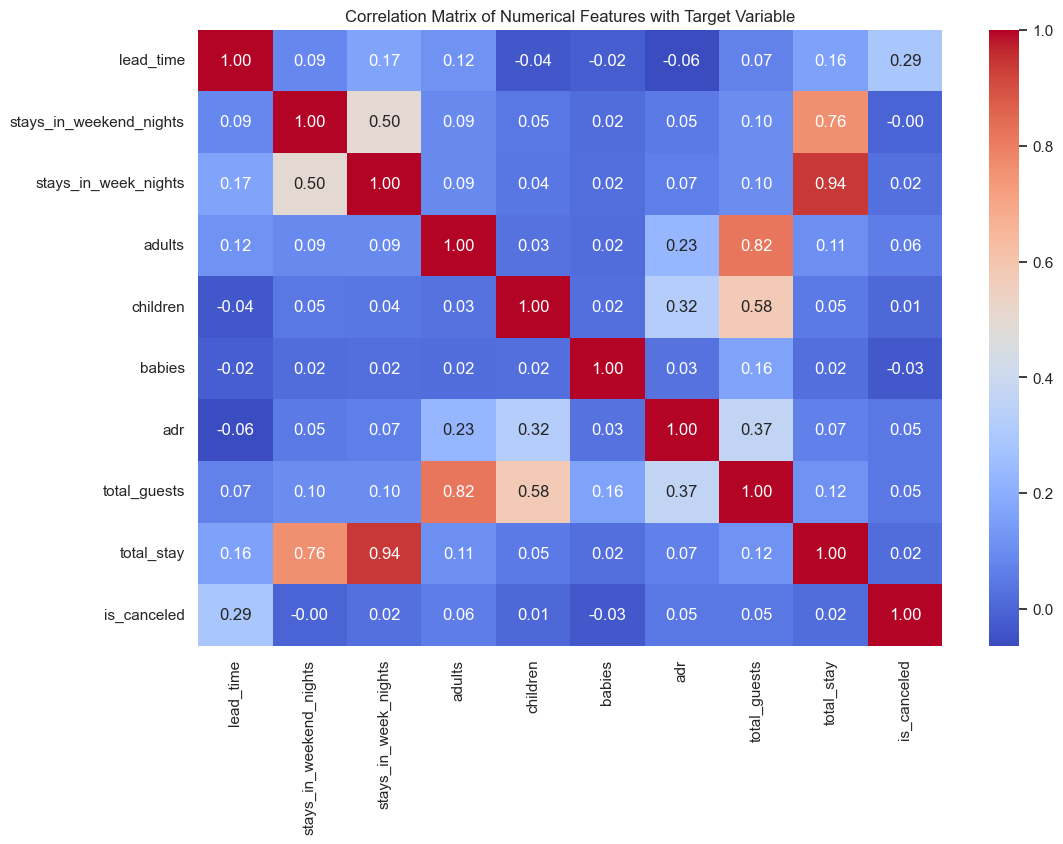

In [17]:
# 1. Function for Correlation of Numerical Features
def analyze_numerical_correlations(data, features, target):
    correlation_matrix = data[features + [target]].corr()
    # Plot heatmap of correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix of Numerical Features with Target Variable')
    plt.show()


# Define the list of numerical features to test
numerical_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                      'adults', 'children', 'babies', 'adr', 'total_guests', 'total_stay']


multicategory_features = ['meal']


# Assuming 'data' is your DataFrame and 'is_canceled' is the target variable
analyze_numerical_correlations(data, numerical_features, 'is_canceled')


Key insights
- 'lead_time' shows the highest correlation with 'is_canceled'
- A longer lead time might give customers more opportunity to change plans, resulting in cancellations.

#### E. Quantify the differences in distributions across the Datasets
- Training set- Set where the model will be trained on
- Seen- testset with the same distribution as Training set, and 
- Unseen test datasets Seen with different distribution from the Training set


Comparing Seen vs. Unseen Test Set Distributions:
KS Test for lead_time between Seen Test and Unseen Test: Statistic=0.0803, P-value=1.886e-27


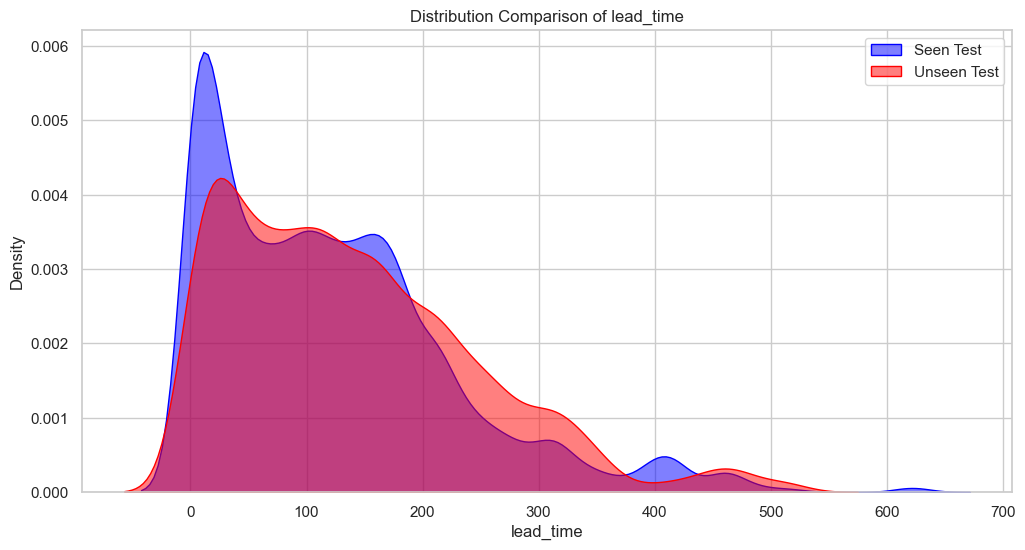

KS Test for adr between Seen Test and Unseen Test: Statistic=0.0515, P-value=1.533e-11


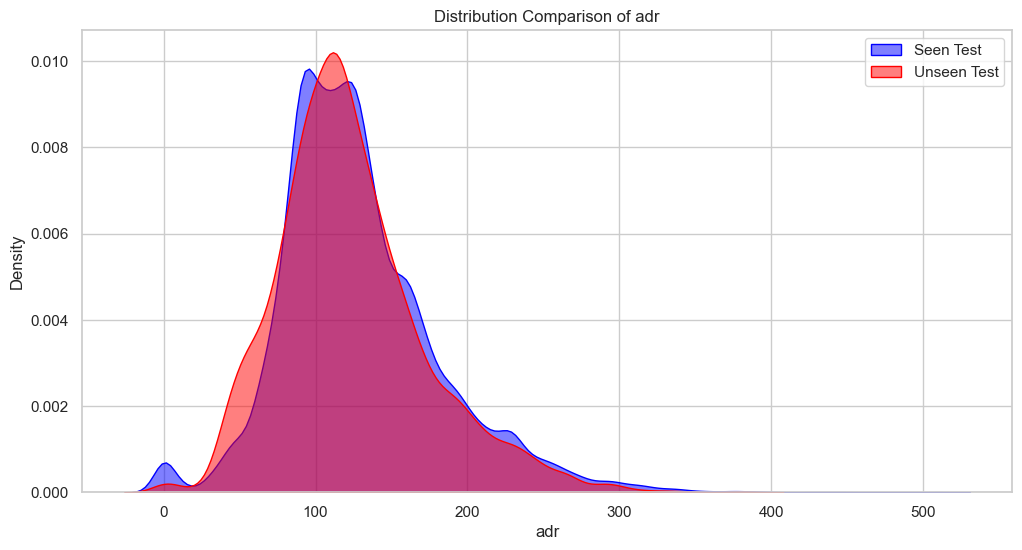

KS Test for total_guests between Seen Test and Unseen Test: Statistic=0.0652, P-value=3.054e-18


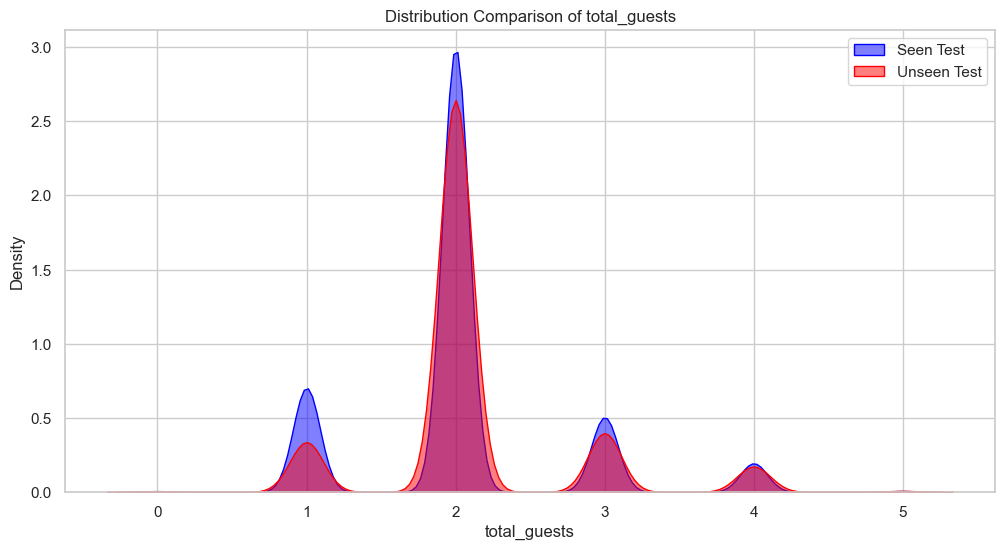

KS Test for total_stay between Seen Test and Unseen Test: Statistic=0.0910, P-value=3.976e-35


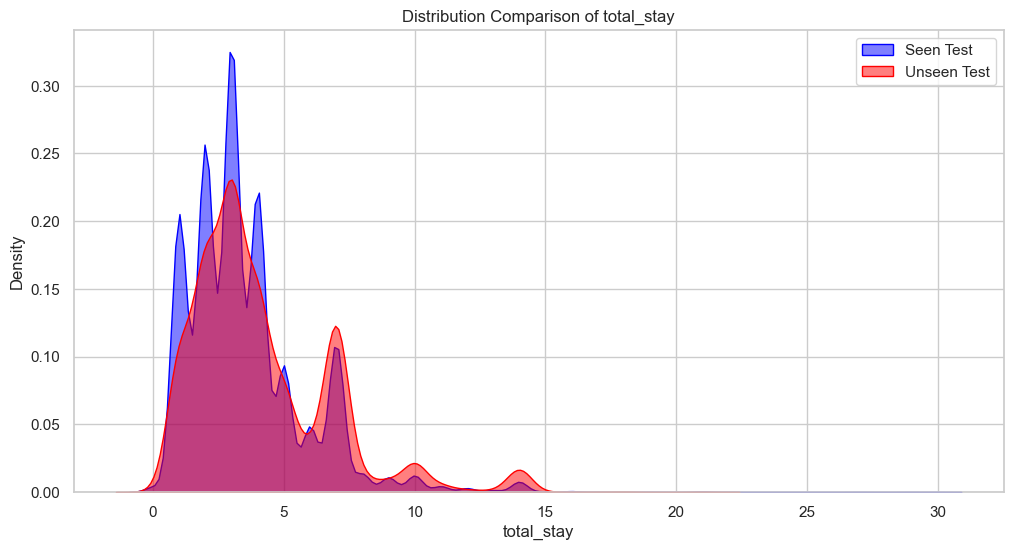

In [18]:

def perform_ks_test_and_visualize(data1, data2, feature, label1, label2):
    # Perform the KS test
    statistic, p_value = ks_2samp(data1[feature].dropna(), data2[feature].dropna())
    print(f"KS Test for {feature} between {label1} and {label2}: Statistic={statistic:.4f}, P-value={p_value:.4g}")
    
    # Visualization
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data1[feature].dropna(), fill=True, common_norm=False, label=label1, color='blue', alpha=0.5)
    sns.kdeplot(data2[feature].dropna(), fill=True, common_norm=False, label=label2, color='red', alpha=0.5)
    plt.title(f'Distribution Comparison of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

numerical_features1 = ['lead_time', 'adr', 'total_guests', 'total_stay']

print("\nComparing Seen vs. Unseen Test Set Distributions:")
for feature in numerical_features1:
    perform_ks_test_and_visualize(test_seen, test_unseen, feature, 'Seen Test', 'Unseen Test')





- Interpreting the KS Statistic and P-value
    - KS Statistic (0.0582): This value represents the maximum difference between the cumulative distribution functions (CDFs) of the seen and unseen test sets for the lead_time feature. While the statistic is relatively small, indicating only a modest difference in distributions, it's important to consider in context.
    - P-value (0.0005081): The p-value is less than 0.05 (common threshold for statistical significance in many studies). This suggests that the difference in distributions of lead_time between the seen and unseen test sets is statistically significant, even if the actual difference in distributions (as indicated by the KS statistic) is not large.

### 2. Model Development

In the Model Development section, we investigate a range of predictive models, sorted by increasing complexity, to evaluate their adaptability under data distribution shifts:

- Models Evaluated:
    - Logistic Regression: Baseline, simple linear model.
    - Random Forest and Gradient Boosting: Advanced ensemble methods for non-linear patterns.
    - Bayesian Neural Network with Monte Carlo Dropout: Adds predictive uncertainty estimates.
    - Deep Neural Network (DNN): Employs multiple layers for capturing deeper data insights.
    - Convolutional Neural Network (CNN): Applies convolutional layers to tabular data.
    - Deep Residual Network (ResNet): Implements deep learning with skip connections for stability.
    - Transformer Model: Most complex, utilizes self-attention for sequential data.
- Test Sets:
   - Seen Test Set: Data matches the training set distribution.
   - Unseen Test Set: Data has a distribution shift as quantified by the Kolmogorov-Smirnov (KS) test.
- Metrics for Evaluation:
   - Standard Metrics: Accuracy, recall, precision, F1-score, ROC-AUC.
   - Uncertainty Metrics: Brier score and Negative Log-Likelihood (NLL).

#### A. Baseline Model: Simple Logistic Regression
First, we'll create a logistic regression model to serve as a baseline. This model is straightforward and provides a quick way to assess the basic predictive power of the features.

In [ ]:


# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluate on seen test set
y_pred_seen_lr = log_reg.predict(X_test_seen)
y_prob_seen_lr = log_reg.predict_proba(X_test_seen)[:, 1]
acc_seen_lr = accuracy_score(y_test_seen, y_pred_seen_lr)

print("Logistic Regression - Seen Test Set Accuracy:", acc_seen_lr)
print("Logistic Regression - Seen Test Set Confusion Matrix:\n", confusion_matrix(y_test_seen, y_pred_seen_lr))
print("Logistic Regression - Seen Test Set Classification Report:\n", classification_report(y_test_seen, y_pred_seen_lr))

# Evaluate on unseen test set
y_pred_unseen_lr = log_reg.predict(X_test_unseen)
y_prob_unseen_lr = log_reg.predict_proba(X_test_unseen)[:, 1]
acc_unseen_lr = accuracy_score(y_test_unseen, y_pred_unseen_lr)

print("Logistic Regression - Unseen Test Set Accuracy:", acc_unseen_lr)
print("Logistic Regression - Unseen Test Set Confusion Matrix:\n", confusion_matrix(y_test_unseen, y_pred_unseen_lr))
print("Logistic Regression - Unseen Test Set Classification Report:\n", classification_report(y_test_unseen, y_pred_unseen_lr))

# Plot ROC Curves
fpr_seen, tpr_seen, _ = roc_curve(y_test_seen, y_prob_seen_lr)
roc_auc_seen = auc(fpr_seen, tpr_seen)
fpr_unseen, tpr_unseen, _ = roc_curve(y_test_unseen, y_prob_unseen_lr)
roc_auc_unseen = auc(fpr_unseen, tpr_unseen)

# For Logistic Regression
print("Logistic Regression Metrics Evaluation:")
brier_seen_lr = brier_score_loss(y_test_seen, y_prob_seen_lr)
brier_unseen_lr = brier_score_loss(y_test_unseen, y_prob_unseen_lr)
nll_seen_lr = log_loss(y_test_seen, y_prob_seen_lr)
nll_unseen_lr = log_loss(y_test_unseen, y_prob_unseen_lr)

print(f"Logistic Regression - Brier Score: Seen {brier_seen_lr:.4f}, Unseen {brier_unseen_lr:.4f}")
print(f"Logistic Regression - NLL: Seen {nll_seen_lr:.4f}, Unseen {nll_unseen_lr:.4f}")


plt.figure(figsize=(12, 6))

plt.plot(fpr_seen, tpr_seen, label=f'Seen Test Set ROC (area = {roc_auc_seen:.2f})')
plt.plot(fpr_unseen, tpr_unseen, label=f'Unseen Test Set ROC (area = {roc_auc_unseen:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

num_features = X_train.shape[1]
num_parameters_lr = num_features + 1  # +1 for the intercept
print("Number of parameters in Logistic Regression model:", num_parameters_lr)

#### B. Ensemble Methods: Random Forest
Next, we'll train more complex ensemble models to capture a broader range of data patterns.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and probabilities for the seen test set
y_pred_seen_rf = rf_model.predict(X_test_seen)
y_prob_seen_rf = rf_model.predict_proba(X_test_seen)[:, 1]
acc_seen_rf = accuracy_score(y_test_seen, y_pred_seen_rf)

# Predictions and probabilities for the unseen test set
y_pred_unseen_rf = rf_model.predict(X_test_unseen)
y_prob_unseen_rf = rf_model.predict_proba(X_test_unseen)[:, 1]
acc_unseen_rf = accuracy_score(y_test_unseen, y_pred_unseen_rf)

# Print evaluation metrics
print("Random Forest - Seen Test Set Accuracy:", acc_seen_rf)
print("Random Forest - Seen Test Set Confusion Matrix:\n", confusion_matrix(y_test_seen, y_pred_seen_rf))
print("Random Forest - Seen Test Set Classification Report:\n", classification_report(y_test_seen, y_pred_seen_rf))

print("Random Forest - Unseen Test Set Accuracy:", acc_unseen_rf)
print("Random Forest - Unseen Test Set Confusion Matrix:\n", confusion_matrix(y_test_unseen, y_pred_unseen_rf))
print("Random Forest - Unseen Test Set Classification Report:\n", classification_report(y_test_unseen, y_pred_unseen_rf))

# ROC Curve Visualization
fpr_seen_rf, tpr_seen_rf, _ = roc_curve(y_test_seen, y_prob_seen_rf)
roc_auc_seen_rf = auc(fpr_seen_rf, tpr_seen_rf)
fpr_unseen_rf, tpr_unseen_rf, _ = roc_curve(y_test_unseen, y_prob_unseen_rf)
roc_auc_unseen_rf = auc(fpr_unseen_rf, tpr_unseen_rf)

# For Random Forest
print("\nRandom Forest Metrics Evaluation:")
brier_seen_rf = brier_score_loss(y_test_seen, y_prob_seen_rf)
brier_unseen_rf = brier_score_loss(y_test_unseen, y_prob_unseen_rf)
nll_seen_rf = log_loss(y_test_seen, y_prob_seen_rf)
nll_unseen_rf = log_loss(y_test_unseen, y_prob_unseen_rf)

print(f"Random Forest - Brier Score: Seen {brier_seen_rf:.4f}, Unseen {brier_unseen_rf:.4f}")
print(f"Random Forest - NLL: Seen {nll_seen_rf:.4f}, Unseen {nll_unseen_rf:.4f}")



plt.figure(figsize=(12, 6))
plt.plot(fpr_seen_rf, tpr_seen_rf, label=f'Seen Test Set ROC (area = {roc_auc_seen_rf:.2f})')
plt.plot(fpr_unseen_rf, tpr_unseen_rf, label=f'Unseen Test Set ROC (area = {roc_auc_unseen_rf:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest')
plt.legend(loc="lower right")
plt.show()


#### C. Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions and evaluation on seen test set
y_pred_seen_gb = gb_model.predict(X_test_seen)
y_prob_seen_gb = gb_model.predict_proba(X_test_seen)[:, 1]
acc_seen_gb = accuracy_score(y_test_seen, y_pred_seen_gb)

# Predictions and evaluation on unseen test set
y_pred_unseen_gb = gb_model.predict(X_test_unseen)
y_prob_unseen_gb = gb_model.predict_proba(X_test_unseen)[:, 1]
acc_unseen_gb = accuracy_score(y_test_unseen, y_pred_unseen_gb)

# Print evaluation metrics
print("Gradient Boosting - Seen Test Set Accuracy:", acc_seen_gb)
print("Gradient Boosting - Unseen Test Set Accuracy:", acc_unseen_gb)

# ROC Curve Visualization
fpr_seen_gb, tpr_seen_gb, _ = roc_curve(y_test_seen, y_prob_seen_gb)
roc_auc_seen_gb = auc(fpr_seen_gb, tpr_seen_gb)
fpr_unseen_gb, tpr_unseen_gb, _ = roc_curve(y_test_unseen, y_prob_unseen_gb)
roc_auc_unseen_gb = auc(fpr_unseen_gb, tpr_unseen_gb)


# For Gradient Boosting
print("\nGradient Boosting Metrics Evaluation:")
brier_seen_gb = brier_score_loss(y_test_seen, y_prob_seen_gb)
brier_unseen_gb = brier_score_loss(y_test_unseen, y_prob_unseen_gb)
nll_seen_gb = log_loss(y_test_seen, y_prob_seen_gb)
nll_unseen_gb = log_loss(y_test_unseen, y_prob_unseen_gb)

print(f"Gradient Boosting - Brier Score: Seen {brier_seen_gb:.4f}, Unseen {brier_unseen_gb:.4f}")
print(f"Gradient Boosting - NLL: Seen {nll_seen_gb:.4f}, Unseen {nll_unseen_gb:.4f}")


plt.figure(figsize=(12, 6))
plt.plot(fpr_seen_gb, tpr_seen_gb, label=f'Seen Test Set ROC (area = {roc_auc_seen_gb:.2f})')
plt.plot(fpr_unseen_gb, tpr_unseen_gb, label=f'Unseen Test Set ROC (area = {roc_auc_unseen_gb:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


#### D. Bayesian Neural Network with Monte Carlo Dropout
For a probabilistic approach, we'll design a simple neural network incorporating dropout layers to simulate Bayesian inference.

In [28]:
# Make copies and ensure data types are float32 for TensorFlow compatibility
X_train_tf = X_train.copy().astype(np.float32)
y_train_tf = y_train.copy().astype(np.float32)
X_test_seen_tf = X_test_seen.copy().astype(np.float32)
y_test_seen_tf = y_test_seen.copy().astype(np.float32)
X_test_unseen_tf = X_test_unseen.copy().astype(np.float32)
y_test_unseen_tf = y_test_unseen.copy().astype(np.float32)

In [ ]:


# Define the Bayesian Neural Network with Monte Carlo Dropout
def create_bnn_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the model
bnn_model = create_bnn_model(X_train_tf.shape[1])
# Calculate and print the total number of parameters
total_params_bnn = bnn_model.count_params()
print(f"Total number of parameters in the Bayesian Neural Network: {total_params_bnn}")

bnn_model.fit(X_train_tf, y_train_tf, epochs=25, batch_size=32, verbose=1)

# Perform Monte Carlo predictions to simulate Bayesian inference
def monte_carlo_predictions(model, X, n_iterations=50):
    predictions = []
    for _ in range(n_iterations):
        # Apply dropout at test time
        predictions.append(model.predict(X))
    return np.mean(predictions, axis=0)

# Monte Carlo predictions for seen and unseen test sets
mc_preds_seen = monte_carlo_predictions(bnn_model, X_test_seen_tf)
mc_preds_unseen = monte_carlo_predictions(bnn_model, X_test_unseen_tf)

# Calculate metrics
acc_seen = accuracy_score(y_test_seen_tf, mc_preds_seen.round())
acc_unseen = accuracy_score(y_test_unseen_tf, mc_preds_unseen.round())
fpr_seen, tpr_seen, _ = roc_curve(y_test_seen_tf, mc_preds_seen)
fpr_unseen, tpr_unseen, _ = roc_curve(y_test_unseen_tf, mc_preds_unseen)
roc_auc_seen = auc(fpr_seen, tpr_seen)
roc_auc_unseen = auc(fpr_unseen, tpr_unseen)


# Output results
print(f"Bayesian Neural Network - Seen Test Set Accuracy: {acc_seen}")
print(f"Bayesian Neural Network - Unseen Test Set Accuracy: {acc_unseen}")


# Calculate Brier Score and NLL for seen and unseen test sets using Monte Carlo predictions
brier_score_seen = brier_score_loss(y_test_seen_tf, mc_preds_seen)
brier_score_unseen = brier_score_loss(y_test_unseen_tf, mc_preds_unseen)
nll_seen = log_loss(y_test_seen_tf, mc_preds_seen)
nll_unseen = log_loss(y_test_unseen_tf, mc_preds_unseen)

# Output additional metrics
print(f"Bayesian Neural Network - Brier Score: Seen {brier_score_seen:.4f}, Unseen {brier_score_unseen:.4f}")
print(f"Bayesian Neural Network - NLL: Seen {nll_seen:.4f}, Unseen {nll_unseen:.4f}")


# Plot ROC Curves
plt.figure(figsize=(10, 5))
plt.plot(fpr_seen, tpr_seen, label=f'Seen Test Set ROC (AUC = {roc_auc_seen:.2f})', color='blue')
plt.plot(fpr_unseen, tpr_unseen, label=f'Unseen Test Set ROC (AUC = {roc_auc_unseen:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Bayesian Neural Network with Monte Carlo Dropout')
plt.legend(loc="lower right")
plt.show()





#### E. Deep Neural Network (DNN)

In [ ]:
# Define the model architecture
def create_dnn_model(input_shape):
    model = Sequential([
        Dense(512, activation='relu', input_dim=input_shape),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the DNN model
dnn_model = create_dnn_model(X_train_tf.shape[1])
#Calculate and print the total number of parameters
total_params_dnn = dnn_model.count_params()
print(f"Total number of parameters in DNN model: {total_params_dnn}")

dnn_model.fit(X_train_tf, y_train_tf, epochs=30, batch_size=32, verbose=1)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, label="Test Set"):
    y_pred = model.predict(X_test).flatten()
    y_prob = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_prob)
    print(f"{label} Accuracy:", accuracy)
    print(f"{label} Confusion Matrix:\n", confusion_matrix(y_test, y_prob))
    print(f"{label} Classification Report:\n", classification_report(y_test, y_prob))
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    brier = brier_score_loss(y_test, y_pred)
    nll = log_loss(y_test, y_pred)
    
    print(f"{label} - Brier Score: {brier:.4f}")
    print(f"{label} - NLL: {nll:.4f}")
    
    plt.plot(fpr, tpr, label=f'{label} ROC (area = {roc_auc:.2f})')

# Evaluation on Seen and Unseen Test Sets
plt.figure(figsize=(12, 6))
evaluate_model(dnn_model, X_test_seen_tf, y_test_seen_tf, "Seen Test Set")
evaluate_model(dnn_model, X_test_unseen_tf, y_test_unseen_tf, "Unseen Test Set")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for DNN')
plt.legend(loc="lower right")
plt.show()



#### F. Convolutional Neural Network (CNN) for Tabular Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, brier_score_loss, log_loss

# Define the CNN model architecture
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(input_shape, 1)),
        Dropout(0.5),
        Conv1D(64, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Convert DataFrame to numpy array and reshape for CNN input
X_train_cnn = X_train_tf.values.reshape((X_train_tf.shape[0], X_train_tf.shape[1], 1))
X_test_seen_cnn = X_test_seen_tf.values.reshape((X_test_seen_tf.shape[0], X_test_seen_tf.shape[1], 1))
X_test_unseen_cnn = X_test_unseen_tf.values.reshape((X_test_unseen_tf.shape[0], X_test_unseen_tf.shape[1], 1))

# Initialize and train the CNN model
cnn_model = create_cnn_model(X_train_tf.shape[1])
# Calculate and print the total number of parameters
total_params_cnn = cnn_model.count_params()
print(f"Total number of parameters in CNN model: {total_params_cnn}")


cnn_model.fit(X_train_cnn, y_train_tf, epochs=35, batch_size=32, verbose=1)



# Function to evaluate the model and plot metrics
def evaluate_model(model, X_test_seen, y_test_seen, X_test_unseen, y_test_unseen):
    y_pred_seen = model.predict(X_test_seen).flatten()
    y_pred_unseen = model.predict(X_test_unseen).flatten()
    y_prob_seen = (y_pred_seen > 0.5).astype(int)
    y_prob_unseen = (y_pred_unseen > 0.5).astype(int)

    accuracy_seen = accuracy_score(y_test_seen, y_prob_seen)
    accuracy_unseen = accuracy_score(y_test_unseen, y_prob_unseen)

    fpr_seen, tpr_seen, _ = roc_curve(y_test_seen, y_pred_seen)
    roc_auc_seen = auc(fpr_seen, tpr_seen)
    fpr_unseen, tpr_unseen, _ = roc_curve(y_test_unseen, y_pred_unseen)
    roc_auc_unseen = auc(fpr_unseen, tpr_unseen)

    plt.figure(figsize=(12, 6))
    plt.plot(fpr_seen, tpr_seen, label=f'Seen Test Set ROC (area = {roc_auc_seen:.2f})', color='blue')
    plt.plot(fpr_unseen, tpr_unseen, label=f'Unseen Test Set ROC (area = {roc_auc_unseen:.2f})', color='red')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for CNN')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Seen Test Set Accuracy: {accuracy_seen}")
    print(f"Unseen Test Set Accuracy: {accuracy_unseen}")
    print(f"Seen Test Set - Brier Score: {brier_score_loss(y_test_seen, y_pred_seen):.4f}")
    print(f"Unseen Test Set - Brier Score: {brier_score_loss(y_test_unseen, y_pred_unseen):.4f}")
    print(f"Seen Test Set - NLL: {log_loss(y_test_seen, y_pred_seen):.4f}")
    print(f"Unseen Test Set - NLL: {log_loss(y_test_unseen, y_pred_unseen):.4f}")

# Evaluation on Seen and Unseen Test Sets
evaluate_model(cnn_model, X_test_seen_cnn, y_test_seen_tf, X_test_unseen_cnn, y_test_unseen_tf)


#### G. Deep Residual Network (ResNet) for Tabular Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Add, Activation, BatchNormalization, LayerNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, brier_score_loss, log_loss

# Define a Residual block as a function
def residual_block(x, units, dropout_rate=0.2, activation='relu', batch_norm=True):
    y = Dense(units)(x)
    if batch_norm:
        y = BatchNormalization()(y)
    y = Activation(activation)(y)
    y = Dropout(dropout_rate)(y)
    y = Dense(units)(y)
    if batch_norm:
        y = BatchNormalization()(y)
    y = Activation(activation)(y)
    y = Dropout(dropout_rate)(y)
    # Add input and output of the block
    y = Add()([x, y])
    return y

# Define the ResNet model architecture
def create_resnet_model(input_shape, num_blocks=4, units=128):
    inputs = Input(shape=(input_shape,))
    x = Dense(units, activation='relu')(inputs)
    # Add residual blocks
    for _ in range(num_blocks):
        x = residual_block(x, units=units)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the ResNet model
resnet_model = create_resnet_model(X_train_tf.shape[1])
# Calculate and print the total number of parameters
total_params_resnet = resnet_model.count_params()
print(f"Total number of parameters in ResNet model: {total_params_resnet}")

resnet_model.fit(X_train_tf, y_train_tf, epochs=40, batch_size=32, verbose=1)

# Function to evaluate the model and plot metrics
def evaluate_resnet_model(model, X_test_seen, y_test_seen, X_test_unseen, y_test_unseen):
    y_pred_seen = model.predict(X_test_seen).flatten()
    y_pred_unseen = model.predict(X_test_unseen).flatten()
    y_prob_seen = (y_pred_seen > 0.5).astype(int)
    y_prob_unseen = (y_pred_unseen > 0.5).astype(int)

    accuracy_seen = accuracy_score(y_test_seen, y_prob_seen)
    accuracy_unseen = accuracy_score(y_test_unseen, y_prob_unseen)

    fpr_seen, tpr_seen, _ = roc_curve(y_test_seen, y_pred_seen)
    roc_auc_seen = auc(fpr_seen, tpr_seen)
    fpr_unseen, tpr_unseen, _ = roc_curve(y_test_unseen, y_pred_unseen)
    roc_auc_unseen = auc(fpr_unseen, tpr_unseen)

    plt.figure(figsize=(12, 6))
    plt.plot(fpr_seen, tpr_seen, label=f'Seen Test Set ROC (area = {roc_auc_seen:.2f})', color='blue')
    plt.plot(fpr_unseen, tpr_unseen, label=f'Unseen Test Set ROC (area = {roc_auc_unseen:.2f})', color='red')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for ResNet')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Seen Test Set Accuracy: {accuracy_seen}")
    print(f"Unseen Test Set Accuracy: {accuracy_unseen}")
    print(f"Seen Test Set - Brier Score: {brier_score_loss(y_test_seen, y_pred_seen):.4f}")
    print(f"Unseen Test Set - Brier Score: {brier_score_loss(y_test_unseen, y_pred_unseen):.4f}")
    print(f"Seen Test Set - NLL: {log_loss(y_test_seen, y_pred_seen):.4f}")
    print(f"Unseen Test Set - NLL: {log_loss(y_test_unseen, y_pred_unseen):.4f}")

# Evaluation on Seen and Unseen Test Sets
evaluate_resnet_model(resnet_model, X_test_seen_tf, y_test_seen_tf, X_test_unseen_tf, y_test_unseen_tf)


#### H. Transformer Model for Tabular Data

In [ ]:

# Define a Transformer block as a layer
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.01):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim),]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Define the Transformer model for tabular data
def create_transformer_model(input_shape, num_heads, ff_dim):
    inputs = Input(shape=(input_shape, 1))
    transformer_block = TransformerBlock(embed_dim=input_shape, num_heads=num_heads, ff_dim=ff_dim)
    x = transformer_block(inputs)
    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.1)(x)
    outputs = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Initialize and train the Transformer model
transformer_model = create_transformer_model(X_train_tf.shape[1], num_heads=4, ff_dim=128)
# Print the number of parameters
total_params = transformer_model.count_params()
print(f"Total number of parameters in Transformer model: {total_params}")

transformer_model.fit(X_train_tf, y_train_tf, epochs=45, batch_size=32, verbose=1)

# Function to evaluate the model
def evaluate_transformer_model(model, X_test_seen, y_test_seen, X_test_unseen, y_test_unseen):
    y_pred_seen = model.predict(X_test_seen).flatten()
    y_pred_unseen = model.predict(X_test_unseen).flatten()
    y_prob_seen = (y_pred_seen > 0.5).astype(int)
    y_prob_unseen = (y_pred_unseen > 0.5).astype(int)

    accuracy_seen = accuracy_score(y_test_seen, y_prob_seen)
    accuracy_unseen = accuracy_score(y_test_unseen, y_prob_unseen)

    fpr_seen, tpr_seen, _ = roc_curve(y_test_seen, y_pred_seen)
    roc_auc_seen = auc(fpr_seen, tpr_seen)
    fpr_unseen, tpr_unseen, _ = roc_curve(y_test_unseen, y_pred_unseen)
    roc_auc_unseen = auc(fpr_unseen, tpr_unseen)

    plt.figure(figsize=(12, 6))
    plt.plot(fpr_seen, tpr_seen, label=f'Seen Test Set ROC (area = {roc_auc_seen:.2f})', color='blue')
    plt.plot(fpr_unseen, tpr_unseen, label=f'Unseen Test Set ROC (area = {roc_auc_unseen:.2f})', color='red')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Transformer Model')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Seen Test Set Accuracy: {accuracy_seen}")
    print(f"Unseen Test Set Accuracy: {accuracy_unseen}")
    print(f"Seen Test Set - Brier Score: {brier_score_loss(y_test_seen, y_pred_seen):.4f}")
    print(f"Unseen Test Set - Brier Score: {brier_score_loss(y_test_unseen, y_pred_unseen):.4f}")
    print(f"Seen Test Set - NLL: {log_loss(y_test_seen, y_pred_seen):.4f}")
    print(f"Unseen Test Set - NLL: {log_loss(y_test_unseen, y_pred_unseen):.4f}")

# Evaluation on Seen and Unseen Test Sets
evaluate_transformer_model(transformer_model, X_test_seen_tf, y_test_seen_tf, X_test_unseen_tf, y_test_unseen_tf)


### 3. Results and Discussion 

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Bayesian Neural Network', 'DNN', 'CNN']

# Total number of parameters for each model
total_parameters = [249, 10000, 28000, 40193, 291841, 2011713]

# Accuracy for seen and unseen data for each model
accuracy_seen = [76.89, 83.38, 84.29, 83.49, 87.53, 90.18]
accuracy_unseen = [72.46, 79.01, 80.79, 78.72, 83.86, 87.15]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(total_parameters, accuracy_seen, marker='o', label='Accuracy Seen', color='blue')
plt.plot(total_parameters, accuracy_unseen, marker='o', label='Accuracy Unseen', color='orange')
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Number of Parameters')
plt.xticks(rotation=45)
plt.legend()

# Annotating model names
for i, model in enumerate(models):
    plt.text(total_parameters[i], accuracy_seen[i], model, ha='right', va='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Bayesian Neural Network', 'DNN', 'CNN']

# Total number of parameters for each model
total_parameters = [249, 10000, 28000, 40193, 291841, 2011713]

# ROC difference for each model
roc_difference = [0.07, 0.02, 0.03, 0.09, 0.06, 0.05]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(total_parameters, roc_difference, marker='o', color='blue')
plt.xlabel('Number of Parameters')
plt.ylabel('ROC Difference')
plt.title('ROC Difference vs Number of Parameters')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Bayesian Neural Network', 'DNN', 'CNN']

# Total number of parameters for each model
total_parameters = [249, 10000, 28000, 40193, 291841, 2011713]

# ROC difference, Brier difference, and NLL difference for each model
roc_difference = [0.07, 0.02, 0.03, 0.09, 0.06, 0.05]
brier_difference = [0.0149, 0.0173, 0.0137, 0.0321, 0.0106, 0.0042]
nll_difference = [0.0428, 0.0416, 0.0363, 0.0880, 0.0352, 0.0148]

# Plotting
plt.figure(figsize=(10, 6))

# ROC difference
plt.plot(total_parameters, roc_difference, marker='o', label='ROC Difference', color='blue')

# Brier difference
plt.plot(total_parameters, brier_difference, marker='o', label='Brier Difference', color='orange')

# NLL difference
plt.plot(total_parameters, nll_difference, marker='o', label='NLL Difference', color='green')

plt.xlabel('Number of Parameters')
plt.ylabel('Difference')
plt.title('Difference vs Number of Parameters')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
